### Important important libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the dataset using pandas
df = pd.read_csv("diabetes_data.csv")

# Display first five entries
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
# Display last five entries
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [4]:
# To know numberb of columns an rows
df.shape

(520, 17)

In [5]:
# to know the Dtype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
# To find if there are any missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

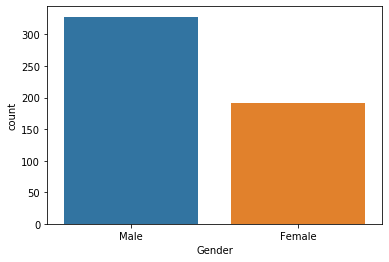

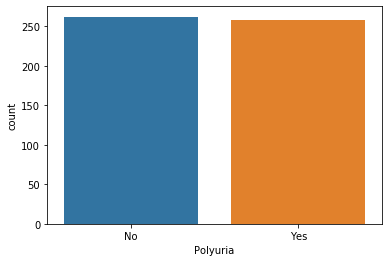

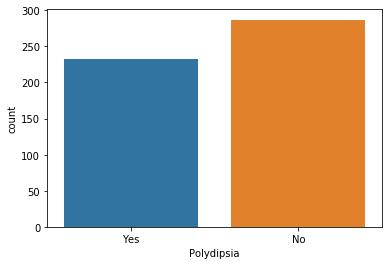

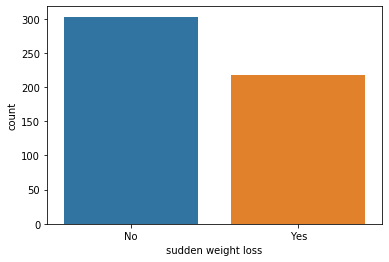

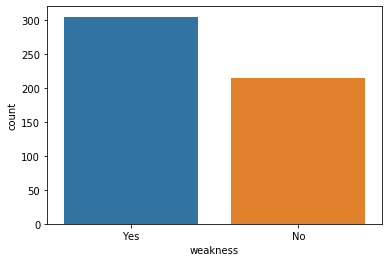

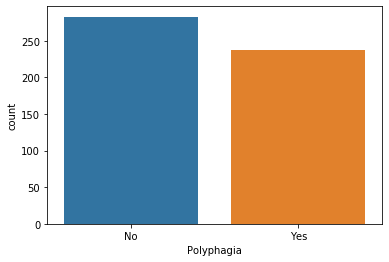

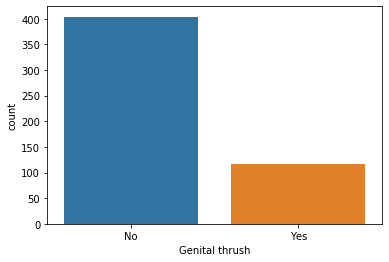

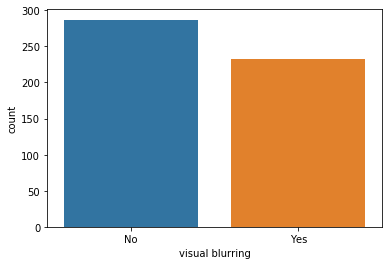

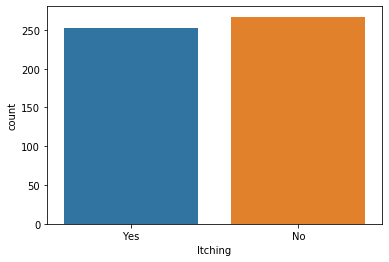

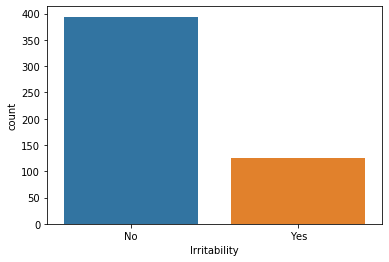

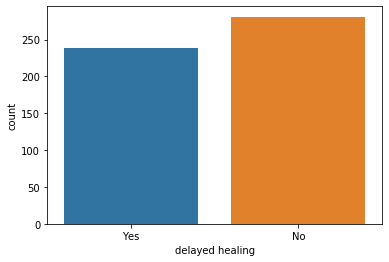

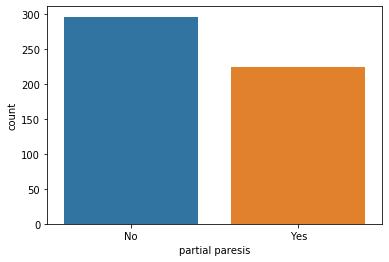

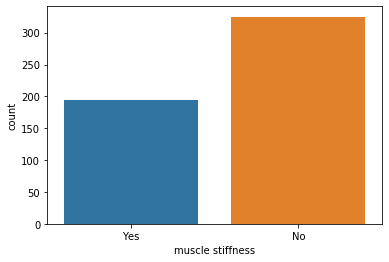

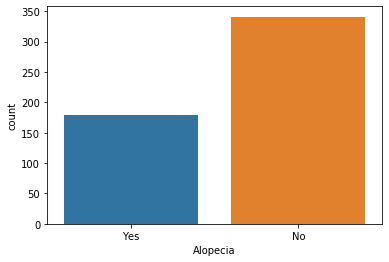

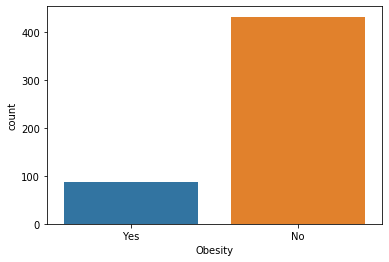

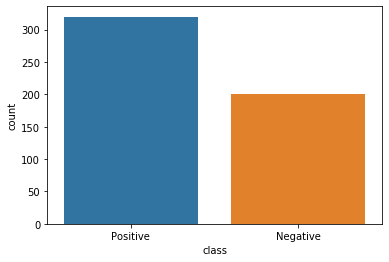

In [7]:
# Countplot for the categorical features
for col in df.columns[~(df.columns.isin(['Age']))]:
    sns.countplot(df[col])
    plt.show()

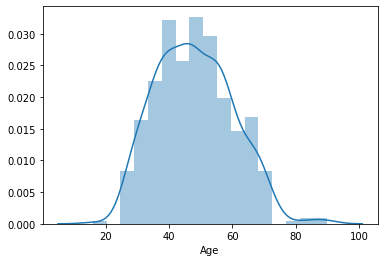

In [8]:
# distributions plot for feature 'Age'
sns.distplot(df.Age)
plt.show()

In [9]:
# Since majority of the features are object time so using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns[~(df.columns.isin(['Age']))].tolist():
    df[col] = le.fit_transform(df[col])

In [10]:
# Display first five entries after label Encoding
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [11]:
# Display last five entries after label Encoding
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting dataset in train and test:

In [12]:
X = df.drop('class',axis=1)
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Modelling

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', fit_intercept=True, random_state=1)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [15]:
#For train data
y_prob_train = log_reg.predict_proba(X_train)[:,1]
y_pred_train = log_reg.predict(X_train)

In [16]:
# for test data
y_prob = log_reg.predict_proba(X_test)[:,1]
y_pred = log_reg.predict(X_test) #to change threshold should do it manually

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('Accuracy for test: ',accuracy_score(y_test,y_pred))

Accuracy for test:  0.9230769230769231


In [18]:
print('Confussion matrix - Train: ','\n',confusion_matrix(y_train,y_pred_train))
print('Overall accuracy - Train: ',accuracy_score(y_train,y_pred_train))

Confussion matrix - Train:  
 [[138   4]
 [ 17 205]]
Overall accuracy - Train:  0.9423076923076923


In [19]:
print('Confussion matrix - Test: ','\n',confusion_matrix(y_test,y_pred))
print('Overall accuracy - Test: ',accuracy_score(y_test,y_pred))

Confussion matrix - Test:  
 [[54  4]
 [ 8 90]]
Overall accuracy - Test:  0.9230769230769231


In [28]:
# for train
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       142
           1       0.98      0.92      0.95       222

    accuracy                           0.94       364
   macro avg       0.94      0.95      0.94       364
weighted avg       0.95      0.94      0.94       364



In [27]:
# for test
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        58
           1       0.96      0.92      0.94        98

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.92       156
weighted avg       0.93      0.92      0.92       156



### ROC Analysis:

AUC of train:  0.9797614515924375


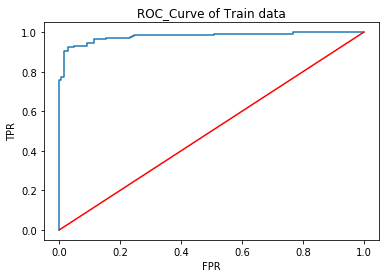

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

print('AUC of train: ', roc_auc_score(y_train, y_prob_train)) #for train data

fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Curve of Train data')
plt.show()

AUC of test:  0.9714989444053483


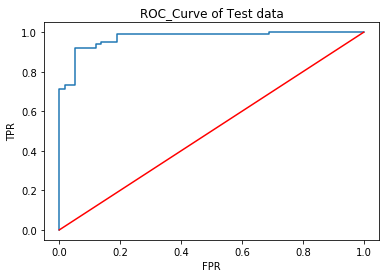

In [21]:
print('AUC of test: ', roc_auc_score(y_test, y_prob)) #for test data

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_Curve of Test data')
plt.show()

In [22]:
thresholds #first one is more than 1

array([1.99971577, 0.99971577, 0.99968293, 0.99967874, 0.9996223 ,
       0.9995143 , 0.99936042, 0.9992362 , 0.99922214, 0.99899703,
       0.99897947, 0.99860474, 0.9984066 , 0.99773992, 0.99745082,
       0.99732028, 0.98985345, 0.9803813 , 0.96864378, 0.96799881,
       0.8947781 , 0.89290324, 0.87349485, 0.86821898, 0.81376435,
       0.78811267, 0.76583846, 0.7246566 , 0.67004004, 0.631335  ,
       0.60874213, 0.45530578, 0.4501487 , 0.44289362, 0.33747166,
       0.32755256, 0.29470824, 0.29262241, 0.28672826, 0.25245254,
       0.2148311 , 0.21474196, 0.1151087 , 0.11312568, 0.09261615,
       0.0922404 , 0.08314601, 0.07891113, 0.07686844, 0.07487432,
       0.07014417, 0.06992185, 0.05983646, 0.05773646, 0.03314047,
       0.01758093, 0.01723977, 0.01670107, 0.01036443])

In [23]:
thresholds[thresholds>1]=1 #made value more than 1 to 1

In [24]:
thresholds

array([1.        , 0.99971577, 0.99968293, 0.99967874, 0.9996223 ,
       0.9995143 , 0.99936042, 0.9992362 , 0.99922214, 0.99899703,
       0.99897947, 0.99860474, 0.9984066 , 0.99773992, 0.99745082,
       0.99732028, 0.98985345, 0.9803813 , 0.96864378, 0.96799881,
       0.8947781 , 0.89290324, 0.87349485, 0.86821898, 0.81376435,
       0.78811267, 0.76583846, 0.7246566 , 0.67004004, 0.631335  ,
       0.60874213, 0.45530578, 0.4501487 , 0.44289362, 0.33747166,
       0.32755256, 0.29470824, 0.29262241, 0.28672826, 0.25245254,
       0.2148311 , 0.21474196, 0.1151087 , 0.11312568, 0.09261615,
       0.0922404 , 0.08314601, 0.07891113, 0.07686844, 0.07487432,
       0.07014417, 0.06992185, 0.05983646, 0.05773646, 0.03314047,
       0.01758093, 0.01723977, 0.01670107, 0.01036443])

AUC of train:  0.9797614515924375


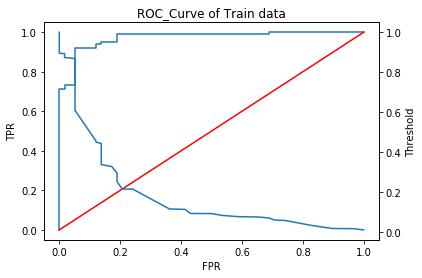

In [25]:
print('AUC of train: ', roc_auc_score(y_train, y_prob_train)) #for train data

fig, ax = plt.subplots()

ax.plot(fpr, tpr) #blue color
ax.plot(fpr, fpr, 'r-') #red color
plt.xlabel('FPR')
plt.ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr,thresholds) 
ax1.set_ylabel('Threshold')

plt.title('ROC_Curve of Train data')
plt.show()